# AKSHAY KAVA
### PGAA4,Andheri
### Goal is to be a Data Scientist

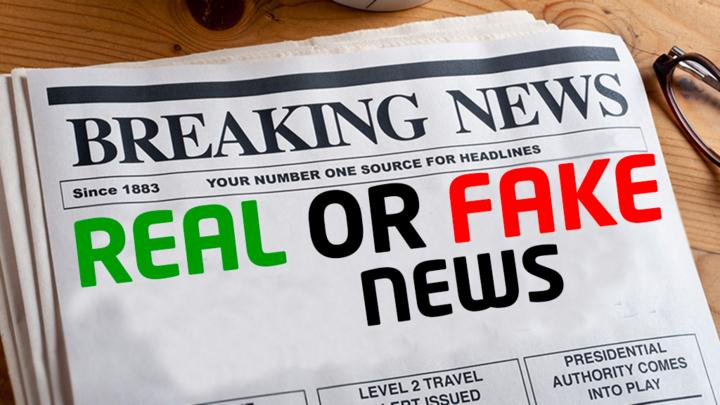

1. The Main purpose of the project is to develope a method for Detecting & Classifying the Fake News Articles using NLP.

2. The Outcome of the Project is to identify the fake News, Which is a classic Text Classification problem.

3. I had gathered the data , Preprocessed the text, & Translated the news into supervised model features.

4. The Ultimate Goal is to develope a model that classifies a given news as either Fake or True

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading the Dataset

In [2]:
df = pd.read_csv('C:/Users/91797/Desktop/Datasets/fake-news/train.csv')

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## Data Pre-processing (Tokenizing,Stemming,Stopwords removal)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

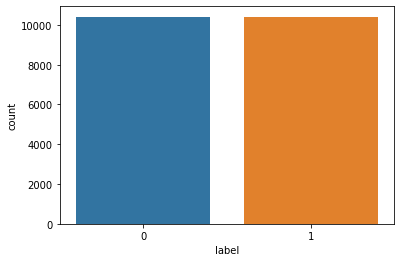

In [8]:
sns.countplot(df.label)    #    0-Fake,   1-Real

#### Dataset is Balanced

In [9]:
#Get the Independent & DependentFeatures
X = df.drop('label',axis=1)
y = df['label']

In [10]:
df = df.dropna()
df.shape

(18285, 5)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

##  Difference BetweenCountVectorizer, TfidfVectorizer, HashingVectorizer

1. Hashing vectorizer can build all documents in one single pass over the data and still keep memory bounded, depends on size of hash-table.

2. In a single pass, you calculate hash of a token.

3. We get representation of current document without looking at every other document in the corpus.

4. There will be more 0 in the array

In [12]:
df.reset_index(inplace=True)

In [13]:
df['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91797\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re      #   Regular Expression
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

# Feature Selection 

## TF-IDF

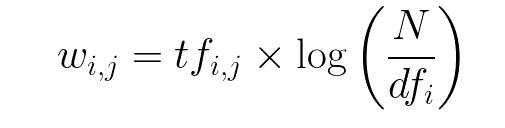

In [17]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [18]:
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [19]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [23]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [24]:
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.019912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.029455,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1. ngram is used to identify the meaning of the word. 

for example: 
1. We need to Book our tickets today. (verb)
2. We need to finish this Book today. (Noun)

In [25]:
y = df['label']
X.shape,y.shape

((18285, 5000), (18285,))

In [26]:
## Divide the dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Model Building
# ------------------------------------------

# 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred_lr=LR.predict(X_test)

In [30]:
LR.score(X_test, y_test)

0.9484141450966096

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3108
           1       0.94      0.94      0.94      2378

    accuracy                           0.95      5486
   macro avg       0.95      0.95      0.95      5486
weighted avg       0.95      0.95      0.95      5486



In [35]:
from sklearn import metrics
metrics.accuracy_score(y_test, pred_lr)

0.9484141450966096

In [36]:
from sklearn.metrics import confusion_matrix

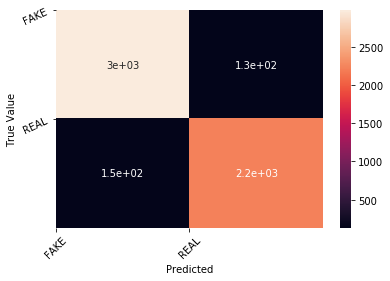

array([[2976,  132],
       [ 151, 2227]], dtype=int64)

In [37]:
cm = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
classes=['FAKE', 'REAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes,rotation=25)
plt.show()
cm

# 2. Decision Tree Classification

In [38]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
pred_dt = DT.predict(X_test)

In [40]:
DT.score(X_test, y_test)

0.8846153846153846

In [41]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      3108
           1       0.86      0.88      0.87      2378

    accuracy                           0.88      5486
   macro avg       0.88      0.88      0.88      5486
weighted avg       0.89      0.88      0.88      5486



In [42]:
metrics.accuracy_score(y_test, pred_dt)

0.8846153846153846

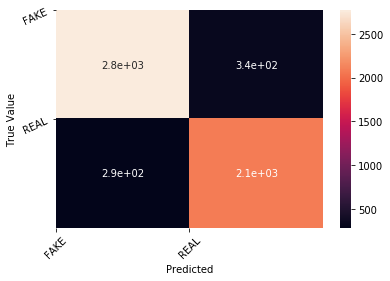

array([[2766,  342],
       [ 291, 2087]], dtype=int64)

In [43]:
cm = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
classes=['FAKE', 'REAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes,rotation=25)
plt.show()
cm

# 3. Random Forest Classifier

In [44]:
RFC = RandomForestClassifier(random_state=5)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [45]:
pred_rfc = RFC.predict(X_test)

In [46]:
RFC.score(X_test, y_test)

0.950419248997448

In [47]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3108
           1       0.96      0.93      0.94      2378

    accuracy                           0.95      5486
   macro avg       0.95      0.95      0.95      5486
weighted avg       0.95      0.95      0.95      5486



In [48]:
metrics.accuracy_score(y_test, pred_rfc)

0.950419248997448

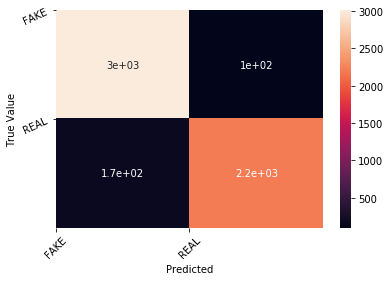

array([[3008,  100],
       [ 172, 2206]], dtype=int64)

In [49]:
cm = confusion_matrix(y_test, pred_rfc)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
classes=['FAKE', 'REAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes,rotation=25)
plt.show()
cm

In [50]:
cm

array([[3008,  100],
       [ 172, 2206]], dtype=int64)

#  MultinomialNB Algorithm

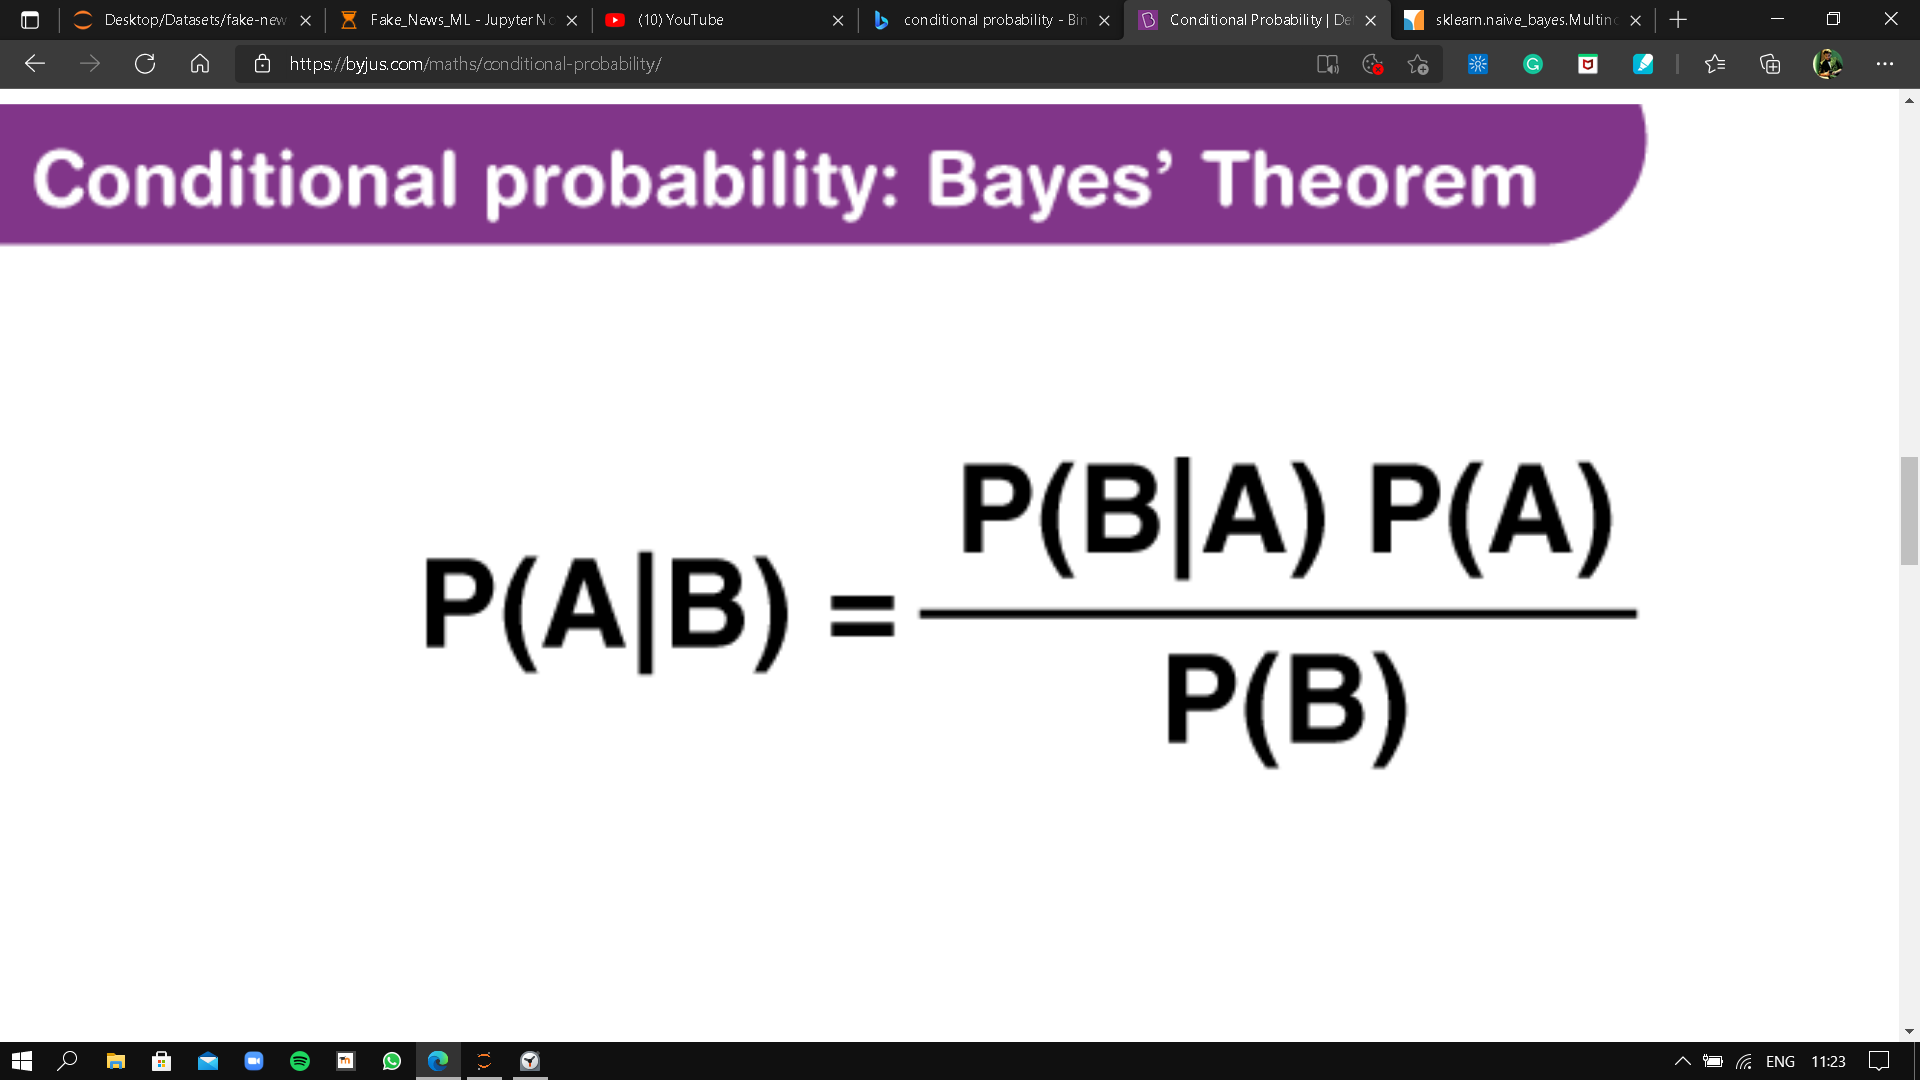

In [51]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [52]:
from sklearn import metrics
import numpy as np

In [53]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [54]:
metrics.accuracy_score(y_test, pred)

0.8988333940940576

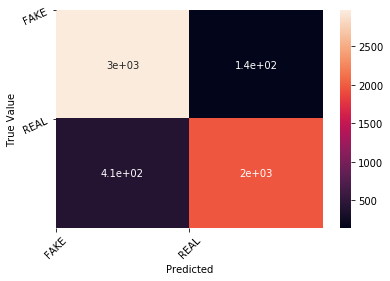

array([[2967,  141],
       [ 414, 1964]], dtype=int64)

In [55]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
classes=['FAKE', 'REAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes,rotation=25)
plt.show()
cm

In [56]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, pred)


0.8988333940940576

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3108
           1       0.93      0.83      0.88      2378

    accuracy                           0.90      5486
   macro avg       0.91      0.89      0.90      5486
weighted avg       0.90      0.90      0.90      5486



# Passive Aggressive Classifier Algorithm

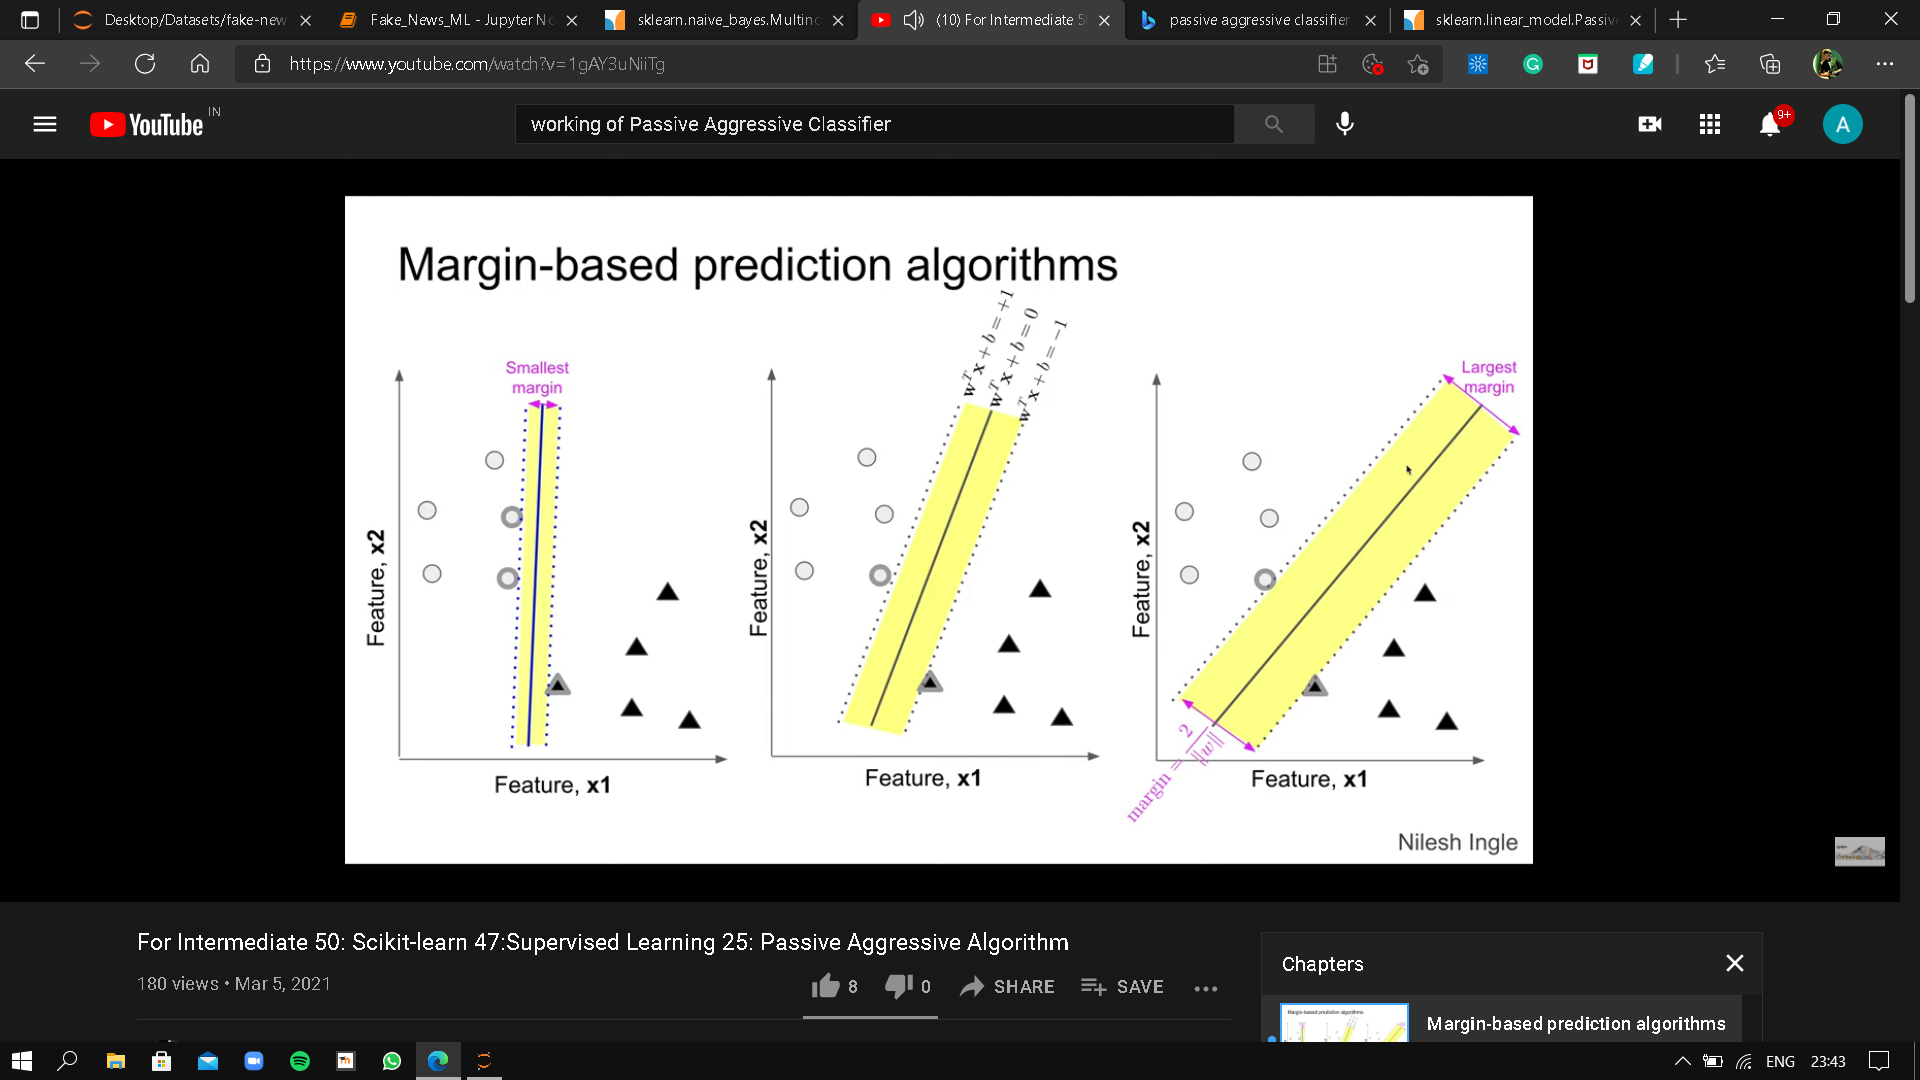 

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)     #max_iter is maximum number of pass, i.e EPOCHS

accuracy:   0.951


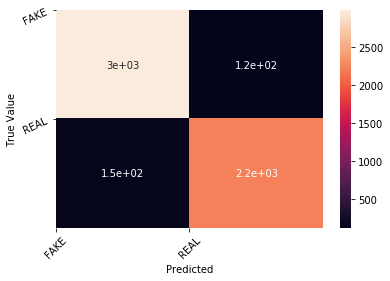

array([[2986,  122],
       [ 149, 2229]], dtype=int64)

In [59]:
linear_clf.fit(X_train, y_train)
pa_pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pa_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pa_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
classes=['FAKE', 'REAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes,rotation=25)
plt.show()
cm

In [60]:
metrics.accuracy_score(y_test, pa_pred)

0.9506015311702516

In [61]:
print(classification_report(y_test, pa_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3108
           1       0.95      0.94      0.94      2378

    accuracy                           0.95      5486
   macro avg       0.95      0.95      0.95      5486
weighted avg       0.95      0.95      0.95      5486



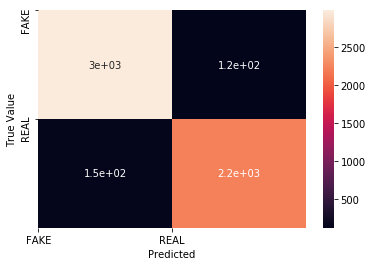

array([[2986,  122],
       [ 149, 2229]], dtype=int64)

In [63]:
cm = confusion_matrix(y_test, pa_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
classes=['FAKE', 'REAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes,rotation=90)
plt.show()
cm

# HashingVectorizer

In [64]:
hs_vectorizer=HashingVectorizer(n_features=5000, alternate_sign=False)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [65]:
X

array([[0.        , 0.15922347, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03785056, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02285155, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06880662, 0.        , ..., 0.        , 0.        ,
        0.        ]])

accuracy:   0.899


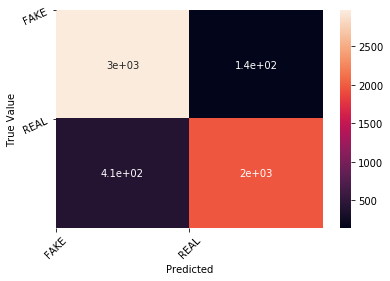

array([[2967,  141],
       [ 414, 1964]], dtype=int64)

In [66]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
hash_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, hash_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, hash_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
classes=['FAKE', 'REAL']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes,rotation=25)
plt.show()
cm

In [67]:
metrics.accuracy_score(y_test, hash_pred)

0.8988333940940576

In [68]:
print(classification_report(y_test, hash_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3108
           1       0.93      0.83      0.88      2378

    accuracy                           0.90      5486
   macro avg       0.91      0.89      0.90      5486
weighted avg       0.90      0.90      0.90      5486



# Evaluation 

In [129]:
Result = pd.DataFrame(data=[[94.84,95,95],[88.77,89,89],[95.05,95,95],[89.98,89,90],[95.04,95,95],[89.88,89,91]],
    columns= ["Accuracy","Recall","Precision"],
    index=['Logisic','Decision','Random Forest   ( BEST )','MultinomialNB','Passive Aggressive','HashingVectorizer']) 

In [130]:
Result

,Accuracy,Recall,Precision
Logisic,94.84,95,95
Decision,88.77,89,89
Random Forest ( BEST ),95.05,95,95
MultinomialNB,89.98,89,90
Passive Aggressive,95.04,95,95
HashingVectorizer,89.88,89,91


## By observing the above Table, the best model with highest Score was Random Forest

In [94]:
Actual_Value = y_test[:20]
Actual_Value.reset_index(drop=True)

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     1
8     1
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: label, dtype: int64

In [123]:
pred_rfc = RFC.predict(X_test)
pred_rfc[:20]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

As we can see the actual and predicted values are same, so we can conclude that our model is a good fit for the classification of Fake News 